In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from main.utils import load_experiment, load_experiments

%reload_ext autoreload
%autoreload 2

In [2]:
plt.style.use('seaborn-v0_8-pastel')

colors = [
    '#1f77b4',  # blue
    '#ff7f0e',  # orange
    '#2ca02c',  # green
    '#d62728',  # red
    '#9467bd',  # purple
    '#8c564b',  # brown
    '#e377c2',  # pink
    '#7f7f7f',  # gray
    '#bcbd22',  # olive
    '#17becf'   # cyan
]

In [3]:
# naming of methods
method_names = {
    'badge': 'BADGE',
    'random': 'Random',
    'entropy': 'Entropy',
    'bald': 'BALD',
    'max_logdet_S': 'Similarity Matrix',
    'empirical_covariance': 'Empirical Covariance',
    'similarity_kmeans': 'Similarity KMeans',
}

# naming of datasets
dataset_names = {
    'mnist': 'MNIST',
    'fashion_mnist': 'Fashion-MNIST',
    'dirty_mnist': 'Dirty-MNIST',
    'repeated_mnist': 'Repeated-MNIST',
    'imagenet': 'ImageNet',
}

## small dataset

In [17]:
dataset = 'repeated_mnist'

seeds = 10
random_ids = [f'random_{dataset}_20_to_200_B=10_' + str(1+i) for i in range(5)]
entropy_ids = [f'entropy_{dataset}_20_to_200_B=10_' + str(1+i) for i in range(seeds)]
bald_ids = [f'bald_{dataset}_20_to_200_B=10_' + str(1+i) for i in range(seeds)]
max_logdet_S_ids = [f'max_logdet_S_{dataset}_20_to_200_B=10_' + str(1+i) for i in range(seeds)]
badge_ids = [f'badge_{dataset}_20_to_200_B=10_' + str(1+i) for i in range(seeds)]
empcov_ids = [f'empirical_covariance_{dataset}_20_to_200_B=10_' + str(1+i) for i in range(seeds)]
sim_kmeans_ids = [f'similarity_kmeans_{dataset}_20_to_200_B=10_' + str(1+i) for i in range(5)]
id_list = [badge_ids, max_logdet_S_ids, sim_kmeans_ids]

Text(0.5, 1.0, 'Repeated-MNIST')

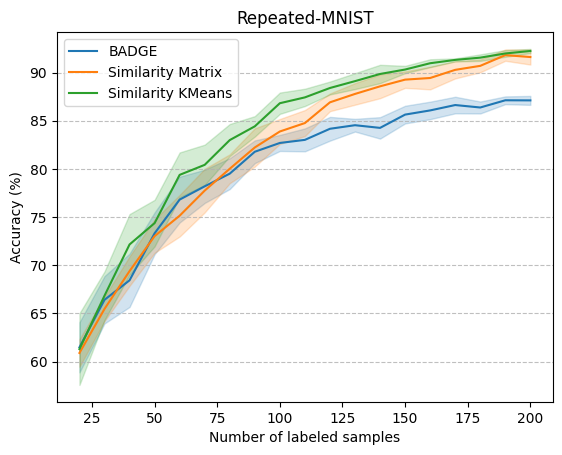

In [18]:
for i, method in enumerate(id_list):
    results = load_experiments(method)

    accuracies = np.array([result[1]['test_accs'] for result in results])
    batch_sizes = np.linspace(20, 200, accuracies.shape[1])
    std = np.std(accuracies, axis=0) / np.sqrt(accuracies.shape[0])
    mean = np.mean(accuracies, axis=0)
    plt.plot(batch_sizes, mean, label=method_names[results[0][0].al_method], color=colors[i])
    plt.fill_between(batch_sizes, mean - 1.96*std, mean + 1.96*std, alpha=0.2, label='_nolegend_', color=colors[i])

plt.legend()
plt.xlabel('Number of labeled samples')
plt.ylabel('Accuracy (%)')
# add horizontal lines background
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.title(f'{dataset_names[dataset]}')

In [187]:
load_experiment(base_dir='experiments', experiment_id='entropy_repeated_mnist_20_to_200_B=10_5')[0].extract_pool

FileNotFoundError: Experiment files not found for ID: entropy_repeated_mnist_20_to_200_B=10_5

In [26]:
times = load_experiment(base_dir='delete_me', experiment_id='random_mnist_20_to_200_B=10_1')[1]['times']

In [30]:
np.mean(times)

0.00011073888486458195